## Regularizing neural networks

### General imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random as rn
import os

### Keras specific imports

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.constraints import maxnorm
from keras.regularizers import l2, l1

Using TensorFlow backend.


### First step is to load data from file and plot a few examples

In [3]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:5000]
train_y_short = train_y[:5000]
print(train_x_short.shape)
print(train_y_short.shape)

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)
(5000, 784)
(5000, 10)


### Plot some examples

In [4]:
def plotExamples(data, labels, model_predict):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])) + "," + str(np.argmax(model_predict[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

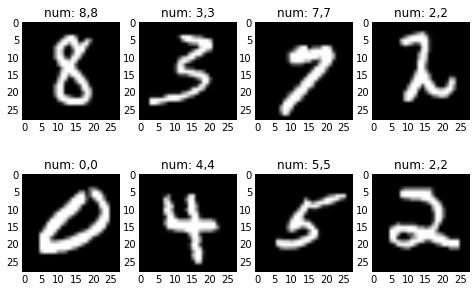

In [5]:
plotExamples(train_x, train_y, train_y)

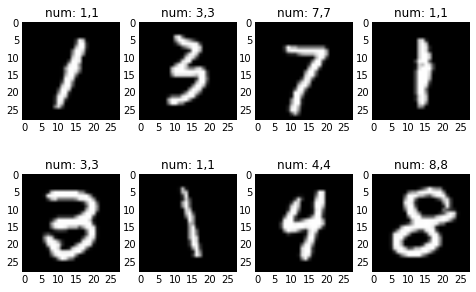

In [6]:
plotExamples(test_x, test_y, test_y)

## Motivating example: Few examples, network with a lot of capacity

In [8]:
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_3 (Dense)                  (None, 1024)          803840      dense_input_2[0][0]              
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 1024)          0           dense_3[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 10)            10250       activation_3[0][0]               
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 10)            0           dense_4[0][0]                    
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
___________________

### Helper functions

In [9]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = 1.0 * np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))
    
def get_correct_and_incorrect(model, test_x, test_y):
    result = model.predict(test_x)
    correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    test_x_correct = test_x[correct_indices]
    test_y_correct = test_y[correct_indices]
    predict_test_y_correct = result[correct_indices]
    incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
    test_x_incorrect = test_x[incorrect_indices]
    test_y_incorrect = test_y[incorrect_indices]
    predict_test_y_incorrect = result[incorrect_indices]
    return test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect, predict_test_y_correct, predict_test_y_incorrect

In [10]:
accuracy(test_x, test_y, model)

Accuracy on data is: 79.13%


## L1 and L2 weight regularization

#### L2 weight regularization
- What happens as you change the value of the regularization parameter?
- Note what has happened to the value of the loss

In [11]:
model = Sequential()
model.add(Dense(1024, input_dim=784, W_regularizer=l2(0.1)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 1024)          803840      dense_input_3[0][0]              
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 1024)          0           dense_5[0][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 10)            10250       activation_5[0][0]               
____________________________________________________________________________________________________
activation_6 (Activation)        (None, 10)            0           dense_6[0][0]                    
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
___________________

In [12]:
accuracy(test_x, test_y, model)

Accuracy on data is: 80.34%


#### L1 weight regularization
- What happens as you change the value of the regularization parameter?

In [13]:
model = Sequential()
model.add(Dense(1024, input_dim=784, W_regularizer=l1(0.1)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=25, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_7 (Dense)                  (None, 1024)          803840      dense_input_4[0][0]              
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 1024)          0           dense_7[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 10)            10250       activation_7[0][0]               
____________________________________________________________________________________________________
activation_8 (Activation)        (None, 10)            0           dense_8[0][0]                    
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
___________________

In [14]:
accuracy(test_x, test_y, model)

Accuracy on data is: 13.03%


### Dropout
- What happens if you increase the proportion of nodes dropped?

In [15]:
'''
Dropout is incorporated through a separate layer, the same dimension of the previous layer
Each node in the dropout layer corresponds to a node in the layer below it
The operation that each dropout layer node performs is to either output zero with probability p, 
or pass on the output of the previous layer node unchanged with probability (1-p)
This has the effect of randomly "deleting" nodes from the layer below with probability p each forward pass
during training
'''

model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_9 (Dense)                  (None, 1024)          803840      dense_input_5[0][0]              
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 1024)          0           dense_9[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 1024)          0           activation_9[0][0]               
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 10)            10250       dropout_1[0][0]                  
___________________________________________________________________________________________

In [16]:
accuracy(test_x, test_y, model)

Accuracy on data is: 81.89%


In [17]:
# Increasing the size of the hidden layers
model = Sequential()
model.add(Dense(2048, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_11 (Dense)                 (None, 2048)          1607680     dense_input_6[0][0]              
____________________________________________________________________________________________________
activation_11 (Activation)       (None, 2048)          0           dense_11[0][0]                   
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 2048)          0           activation_11[0][0]              
____________________________________________________________________________________________________
dense_12 (Dense)                 (None, 10)            20490       dropout_2[0][0]                  
___________________________________________________________________________________________

In [18]:
accuracy(test_x, test_y, model)

Accuracy on data is: 82.67%


### Combining different types of regularization
- L2 and Dropout

In [19]:
model = Sequential()
model.add(Dense(2048, input_dim=784, W_regularizer=l1(0.005)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=30, validation_split=0.9, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_13 (Dense)                 (None, 2048)          1607680     dense_input_7[0][0]              
____________________________________________________________________________________________________
activation_13 (Activation)       (None, 2048)          0           dense_13[0][0]                   
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 2048)          0           activation_13[0][0]              
____________________________________________________________________________________________________
dense_14 (Dense)                 (None, 10)            20490       dropout_3[0][0]                  
___________________________________________________________________________________________

In [20]:
accuracy(test_x, test_y, model)

Accuracy on data is: 83.95%
